In [74]:
import numpy
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

zip_file_path = '/content/archive.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get a list of file names in the zip file
    file_names = zip_ref.namelist()

    # Choose the file to read (e.g., the first file)
    file_to_read = file_names[0]

    # Read the selected file into a pandas DataFrame
    data = pd.read_csv(zip_ref.open(file_to_read))

data.head()

Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0            1   58  Female        Married         IT    Manager          1   
1            2   48  Female        Married      Sales  Assistant          5   
2            3   34    Male        Married  Marketing  Assistant          1   
3            4   27  Female       Divorced  Marketing    Manager          1   
4            5   40    Male       Divorced  Marketing  Executive          1   

   Monthly_Income  Hourly_Rate  Years_at_Company  ...  Overtime  \
0           15488           28                15  ...        No   
1           13079           28                 6  ...       Yes   
2           13744           24                24  ...       Yes   
3            6809           26                10  ...        No   
4           10206           52                29  ...        No   

   Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  \
0              6                             54           17   
1              2                             45            1   
2              6                             34            2   
3              9                             48           18   
4              3                             33            0   

   Work_Environment_Satisfaction  Relationship_with_Manager Job_Involvement  \
0                              4                          4               4   
1                              4                          1               2   
2                              3                          4               4   
3                              2                          3               1   
4                              4                          1               3   

   Distance_From_Home  Number_of_Companies_Worked  Attrition  
0                  20                           3         No  
1                  25                           2         No  
2                  45                           3         No  
3                  35                           3         No  
4                  44                           3         No  

[5 rows x 26 columns]

In [46]:
# Print the first 12 rows of the dataset to get an initial view of the data
print("First 12 rows:")
print(data.head(12))  # Displays the first 12 rows of the dataset

# Print the last 12 rows of the dataset to examine the ending portion of the data
print("Last 12 rows:")
print(data.tail(12))  # Displays the last 12 rows of the dataset


First 12 rows:
    Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0             1   58  Female        Married         IT    Manager          1   
1             2   48  Female        Married      Sales  Assistant          5   
2             3   34    Male        Married  Marketing  Assistant          1   
3             4   27  Female       Divorced  Marketing    Manager          1   
4             5   40    Male       Divorced  Marketing  Executive          1   
5             6   58    Male       Divorced    Finance  Assistant          3   
6             7   38    Male       Divorced         HR    Analyst          1   
7             8   42  Female       Divorced  Marketing    Manager          3   
8             9   30    Male        Married         IT    Analyst          5   
9            10   30    Male        Married  Marketing    Analyst          3   
10           11   43  Female        Married    Finance  Executive          5   
11           12   55  Fem

In [47]:
# Print the total number of rows and columns in the dataset
print("The total rows and columns:", data.shape)

The total rows and columns: (1000, 26)


In [48]:
# Print a message indicating that data types will be displayed
print("The data types:")

# Print the data type of each column in the dataset
print(data.dtypes)


The data types:
Employee_ID                       int64
Age                               int64
Gender                           object
Marital_Status                   object
Department                       object
Job_Role                         object
Job_Level                         int64
Monthly_Income                    int64
Hourly_Rate                       int64
Years_at_Company                  int64
Years_in_Current_Role             int64
Years_Since_Last_Promotion        int64
Work_Life_Balance                 int64
Job_Satisfaction                  int64
Performance_Rating                int64
Training_Hours_Last_Year          int64
Overtime                         object
Project_Count                     int64
Average_Hours_Worked_Per_Week     int64
Absenteeism                       int64
Work_Environment_Satisfaction     int64
Relationship_with_Manager         int64
Job_Involvement                   int64
Distance_From_Home                int64
Number_of_Companies_Work

In [49]:
# Print a message indicating that the first column name will be displayed
print("The name of the first column:", data.columns[0])

The name of the first column: Employee_ID


In [50]:
# Prints a message indicating that a summary of the dataset will be displayed
print("The summary of the dataset:")

# Display a summary of the dataset,including column names,non-null values and data types
print(data.info())


The summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000

In [51]:
# Print the entire 'Age' column values
print(f"The age column values:\n{data['Age']}")

# Print the unique age values in the dataset
print("Unique age values:")
print(data['Age'].unique())


The age column values:
0      58
1      48
2      34
3      27
4      40
       ..
995    27
996    47
997    50
998    28
999    48
Name: Age, Length: 1000, dtype: int64
Unique age values:
[58 48 34 27 40 38 42 30 43 55 59 22 41 21 49 57 52 31 44 46 47 35 56 26
 28 37 23 33 45 39 54 36 25 53 29 50 20 24 32 51]


In [52]:
# Print a message indicating that the most frequent age value is being displayed
print(f"The most frequent age in the dataset:")

# Find and print the most frequently occurring (mode) age value
print(data['Age'].mode()[0])


The most frequent age in the dataset:
52


In [53]:
numeric_column = 'Age'

# Print a header message indicating statistics for the selected column
print(f"\nStatistics for {numeric_column}:")

# Print the mean (average) of the selected numerical column
print(f"Mean: {data[numeric_column].mean()}")

# Print the median (middle value) of the selected numerical column
print(f"Median: {data[numeric_column].median()}")

# Print the standard deviation (measure of variability) of the selected numerical column
print(f"Standard Deviation: {data[numeric_column].std()}")

# Print the first quartile (20th percentile) of the selected numerical column
print(f"q1: {data[numeric_column].quantile(0.2)}")

# Print the third quartile (75th percentile) of the selected numerical column
print(f"q3: {data[numeric_column].quantile(0.75)}")



Statistics for Age:
Mean: 39.991
Median: 41.0
Standard Deviation: 11.78005469803468
q1: 27.0
q3: 50.25


In [54]:
# Filter the dataset to include only rows where Age is greater than 30
filtered_df = data[data['Age'] > 30]
# Print a message indicating that the filtered data will be displayed
print("Filtered age (employees older than 30):")
# Print the filtered dataset
print(filtered_df)


Filtered age (employees older than 30):
     Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0              1   58  Female        Married         IT    Manager          1   
1              2   48  Female        Married      Sales  Assistant          5   
2              3   34    Male        Married  Marketing  Assistant          1   
4              5   40    Male       Divorced  Marketing  Executive          1   
5              6   58    Male       Divorced    Finance  Assistant          3   
..           ...  ...     ...            ...        ...        ...        ...   
991          992   55  Female        Married         HR    Manager          1   
994          995   56    Male         Single         HR    Manager          1   
996          997   47    Male         Single         IT    Manager          4   
997          998   50  Female       Divorced         IT  Executive          1   
999         1000   48  Female       Divorced         IT    Analyst   

In [55]:
# Filter the dataset to include only rows where the Job_Role starts with the letter 'A'
starts_with_A = data[data['Job_Role'].str.startswith('A')]

# Print a message indicating that the filtered data will be displayed
print(f"Job roles starting with 'A':\n{starts_with_A}")


Job roles starting with 'A':
     Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  \
1              2   48  Female        Married      Sales  Assistant          5   
2              3   34    Male        Married  Marketing  Assistant          1   
5              6   58    Male       Divorced    Finance  Assistant          3   
6              7   38    Male       Divorced         HR    Analyst          1   
8              9   30    Male        Married         IT    Analyst          5   
..           ...  ...     ...            ...        ...        ...        ...   
988          989   52    Male        Married      Sales  Assistant          2   
989          990   59  Female        Married      Sales  Assistant          3   
990          991   31    Male         Single         HR    Analyst          3   
995          996   27  Female       Divorced         HR    Analyst          2   
999         1000   48  Female       Divorced         IT    Analyst          2   

In [56]:
# Count the total number of duplicate rows in the dataset
duplicates = data.duplicated().sum()

# Print the total number of duplicate rows
print(f"Total number of duplicates: {duplicates}")

# Remove duplicate rows from the dataset (in-place modification)
data.drop_duplicates(inplace=True)


Total number of duplicates: 0


In [57]:
# Convert the 'Age' column from numeric to string
data['Age'] = data['Age'].astype(str)

# Checks and prints the unique data types present in the 'Age' column after conversion
print(data['Age'].apply(type).unique())


[<class 'str'>]


In [58]:
# Groups the dataset by 'Gender' and 'Department' and counts the number of records in each group
grouped = data.groupby(['Gender', 'Department']).size()

# Print the grouped data showing the count of employees by Gender and Department
print(grouped)


Gender  Department
Female  Finance       101
        HR            104
        IT             87
        Marketing      91
        Sales         101
Male    Finance       117
        HR            107
        IT             87
        Marketing     107
        Sales          98
dtype: int64


In [59]:
# Checking for missing values in each column
missing_values = data.isnull().sum()

# Displaying the count of missing values per column
print("Missing values:")
print(missing_values)


Missing values:
Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64


In [60]:
# Loop through all columns
for col in data.columns:

    # Check if the column is categorical
    if data[col].dtype == 'object' or pd.api.types.is_categorical_dtype(data[col]):

        # Ensure the column has a mode value before filling missing values
        if not data[col].mode().empty:
            # Fill missing values in categorical columns with the most frequent value
            data.loc[:, col] = data[col].fillna(data[col].mode()[0])

    else:  # If the column is numerical

        # Check if it's a numeric column and if it has at least one non-missing value
        if pd.api.types.is_numeric_dtype(data[col]) and not data[col].isna().all():
            # Fill missing values in numeric columns with the median value
            data.loc[:, col] = data[col].fillna(data[col].median())

# Print the updated dataset
print(data)


     Employee_ID Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0              1  58  Female        Married         IT    Manager          1   
1              2  48  Female        Married      Sales  Assistant          5   
2              3  34    Male        Married  Marketing  Assistant          1   
3              4  27  Female       Divorced  Marketing    Manager          1   
4              5  40    Male       Divorced  Marketing  Executive          1   
..           ...  ..     ...            ...        ...        ...        ...   
995          996  27  Female       Divorced         HR    Analyst          2   
996          997  47    Male         Single         IT    Manager          4   
997          998  50  Female       Divorced         IT  Executive          1   
998          999  28  Female        Married         HR  Executive          4   
999         1000  48  Female       Divorced         IT    Analyst          2   

     Monthly_Income  Hourly_Rate  Years

<ipython-input-60-112860b20446>:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if data[col].dtype == 'object' or pd.api.types.is_categorical_dtype(data[col]):


In [61]:
# Check if the 'Monthly_Income' column exists in the dataset before applying binning
if 'Monthly_Income' in data.columns:

    # Divide the 'Monthly_Income' column into 5 equal-width bins
    data['Monthly_Income'] = pd.cut(data['Monthly_Income'], bins=5)

    # Print the count of records in each income bin
    print(data['Monthly_Income'].value_counts())


Monthly_Income
(16599.4, 19999.0]    212
(9800.2, 13199.8]     206
(6400.6, 9800.2]      203
(2984.002, 6400.6]    202
(13199.8, 16599.4]    177
Name: count, dtype: int64


In [62]:
# Identifies the row with the highest salary by finding the index of the maximum Monthly_Income
max_salary = data.loc[data['Monthly_Income'].idxmax()]

print("Max salary:")
print(max_salary)


Max salary:
Employee_ID                                       6
Age                                              58
Gender                                         Male
Marital_Status                             Divorced
Department                                  Finance
Job_Role                                  Assistant
Job_Level                                         3
Monthly_Income                   (16599.4, 19999.0]
Hourly_Rate                                      48
Years_at_Company                                 15
Years_in_Current_Role                             9
Years_Since_Last_Promotion                        3
Work_Life_Balance                                 4
Job_Satisfaction                                  2
Performance_Rating                                3
Training_Hours_Last_Year                         66
Overtime                                         No
Project_Count                                     9
Average_Hours_Worked_Per_Week                    35


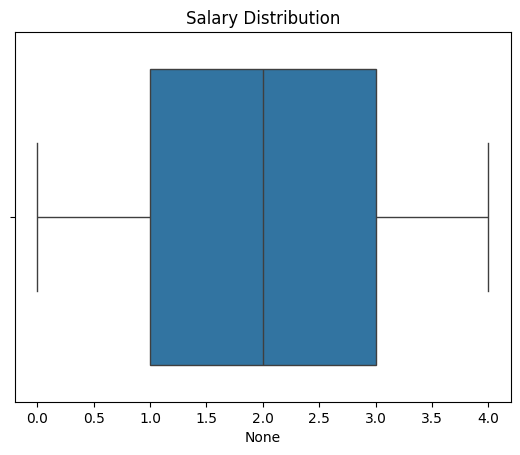

In [63]:
# Create a boxplot for Monthly_Income
sns.boxplot(x=data['Monthly_Income'].cat.codes)  # .cat.codes converts categorical bins into numerical codes

#title of the boxplot
plt.title('Salary Distribution')

#Display the plot
plt.show()


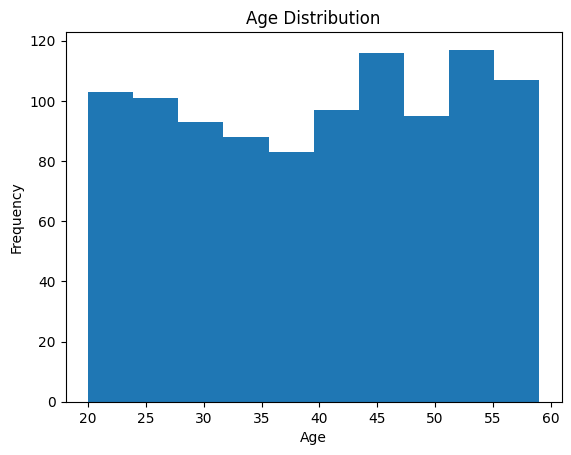

In [64]:
# Create a histogram to visualize the distribution of the 'Age' column
plt.hist(data['Age'].astype(int), bins=10)

# title of the histogram
plt.title('Age Distribution')

# Label the x-axis to indicate the age values
plt.xlabel('Age')

# Label the y-axis to show the frequency of each age range
plt.ylabel('Frequency')
plt.show()


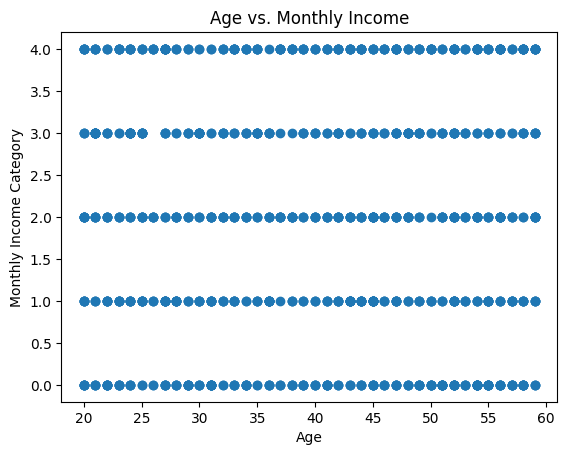

In [21]:
# Create a scatter plot to visualize the relationship between Age and Monthly Income categories
plt.scatter(data['Age'].astype(int), data['Monthly_Income'].cat.codes)

# Set the title of the scatter plot
plt.title('Age vs. Monthly Income')

# Label the x-axis to indicate Age values
plt.xlabel('Age')

# Label the y-axis to indicate Monthly Income categories
plt.ylabel('Monthly Income Category')

# Display the scatter plot
plt.show()


In [22]:
numeric_cols = data.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).columns
print(f"Numeric columns: {numeric_cols}")

# Standardize the numeric columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display the standardized data
print(data.head())

Numeric columns: Index(['Employee_ID', 'Job_Level', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object')
   Employee_ID Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0    -1.730320  58  Female        Married         IT    Manager  -1.468616   
1    -1.726856  48  Female        Married      Sales  Assistant   1.390004   
2    -1.723391  34    Male        Married  Marketing  Assistant  -1.468616   
3    -1.719927  27  Female       Divorced  Marketing    Manager  -1.468616   
4    -1.716463  40    Male       Divorced  Marketing  Executive  -1.468616   

       Monthly_Income  Hourly_Rate 

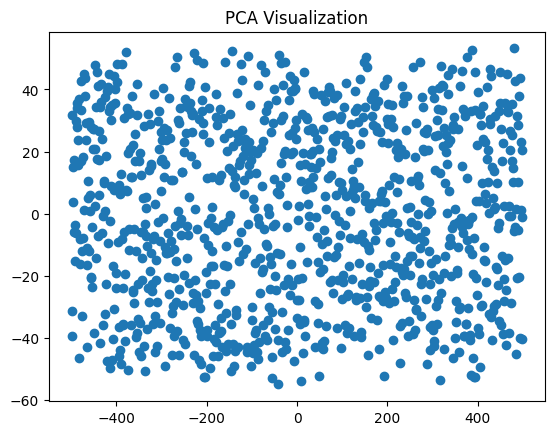

In [65]:
# Apply PCA to reduce the numeric dataset to 2 principal components
pca = PCA(n_components=2)

# Transform the numeric columns using PCA
pca_result = pca.fit_transform(data[numeric_cols])

# Create a scatter plot of the two principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Set the title of the scatter plot
plt.title('PCA Visualization')

# Display the scatter plot
plt.show()

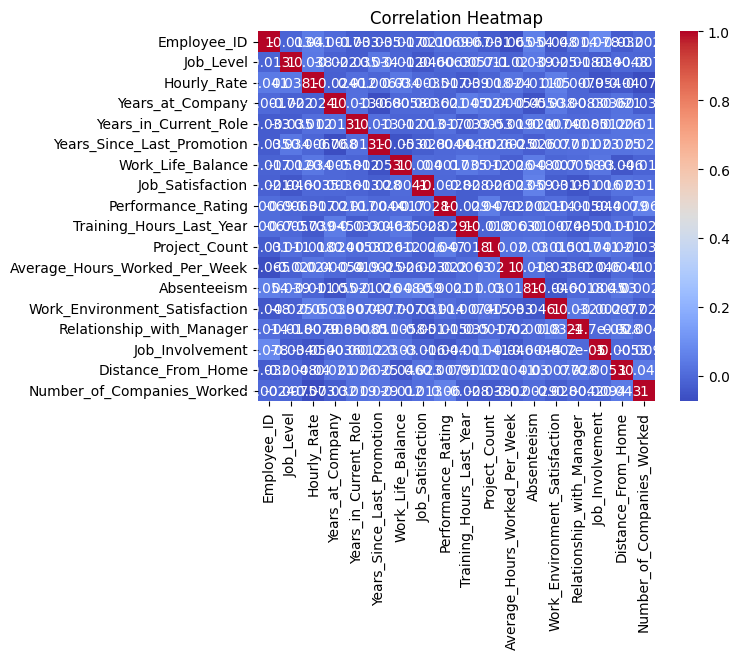

In [66]:
# Compute the correlation matrix for the numerical columns
correlation = data[numeric_cols].corr()

# Create a heatmap to visualize the correlation between numerical features
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [67]:
# Print a message indicating that the correlation matrix is being displayed
print("Correlation matrix:")

# Print the correlation matrix for numerical columns
print(correlation)


Correlation matrix:
                               Employee_ID  Job_Level  Hourly_Rate  \
Employee_ID                       1.000000  -0.013340     0.040863   
Job_Level                        -0.013340   1.000000     0.038381   
Hourly_Rate                       0.040863   0.038381     1.000000   
Years_at_Company                 -0.001709  -0.021553    -0.024160   
Years_in_Current_Role            -0.032868  -0.034784     0.011534   
Years_Since_Last_Promotion       -0.034913   0.034033    -0.006745   
Work_Life_Balance                -0.016545  -0.011792     0.033651   
Job_Satisfaction                 -0.020782  -0.046251    -0.003476   
Performance_Rating                0.006935  -0.006314    -0.017170   
Training_Hours_Last_Year          0.006736  -0.005739    -0.039236   
Project_Count                    -0.031376   0.010883    -0.017837   
Average_Hours_Worked_Per_Week    -0.064954  -0.020160     0.024279   
Absenteeism                       0.054185   0.039282    -0.010878   


In [26]:
# Check if the 'Department' column exists in the dataset before performing the operation
if 'Department' in data.columns:

    # Count the occurrences of each unique value in the 'Department' column
    print(data['Department'].value_counts())


Department
Finance      218
HR           211
Sales        199
Marketing    198
IT           174
Name: count, dtype: int64


In [68]:
# Create a new feature by concatenating 'Age' and 'Department' as a string
data['new_feature'] = data['Age'].astype(str) + " - " + data['Department']

# Display the first five rows to check the newly created feature
print(data.head())



   Employee_ID Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0            1  58  Female        Married         IT    Manager          1   
1            2  48  Female        Married      Sales  Assistant          5   
2            3  34    Male        Married  Marketing  Assistant          1   
3            4  27  Female       Divorced  Marketing    Manager          1   
4            5  40    Male       Divorced  Marketing  Executive          1   

       Monthly_Income  Hourly_Rate  Years_at_Company  ...  Project_Count  \
0  (13199.8, 16599.4]           28                15  ...              6   
1   (9800.2, 13199.8]           28                 6  ...              2   
2  (13199.8, 16599.4]           24                24  ...              6   
3    (6400.6, 9800.2]           26                10  ...              9   
4   (9800.2, 13199.8]           52                29  ...              3   

   Average_Hours_Worked_Per_Week  Absenteeism  Work_Environment_Satisfacti

In [87]:
# Import necessary libraries for data handling and splitting
import pandas as pd
from sklearn.model_selection import train_test_split

zip_file_path = '/content/archive.zip'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get a list of file names in the zip file
    file_names = zip_ref.namelist()

    # Choose the file to read (e.g., the first file)
    file_to_read = file_names[0]

    # Read the selected file into a pandas DataFrame
    data = pd.read_csv(zip_ref.open(file_to_read))

# Clean and encode the target
data['Attrition'] = data['Attrition'].astype(str).str.strip().str.title()
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Drop rows where target mapping failed
data = data.dropna(subset=['Attrition'])

# Drop Employee_ID if it exists
if 'Employee_ID' in data.columns:
    data = data.drop('Employee_ID', axis=1)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# Separate features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# One-hot encode the categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(X.dtypes)


Categorical columns to encode: ['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime']
Final data shape: (1000, 25)
Encoded features shape: (1000, 30)
Training set shape: (800, 30)
Testing set shape: (200, 30)
Target distribution:
 Attrition
0    811
1    189
Name: count, dtype: int64
Age                               int64
Gender                           object
Marital_Status                   object
Department                       object
Job_Role                         object
Job_Level                         int64
Monthly_Income                    int64
Hourly_Rate                       int64
Years_at_Company                  int64
Years_in_Current_Role             int64
Years_Since_Last_Promotion        int64
Work_Life_Balance                 int64
Job_Satisfaction                  int64
Performance_Rating                int64
Training_Hours_Last_Year          int64
Overtime                         object
Project_Count                     int64
Average_Hours_Worked_Pe

In [89]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Confirm final shape
print("Final data shape:", data.shape)
print("Encoded features shape:", X_encoded.shape)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Target distribution:\n", y.value_counts())

Final data shape: (1000, 25)
Encoded features shape: (1000, 30)
Training set shape: (800, 30)
Testing set shape: (200, 30)
Target distribution:
 Attrition
0    811
1    189
Name: count, dtype: int64


In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Fix any interval columns just in case
for col in X_train.columns:
    if isinstance(X_train[col].dtype, pd.IntervalDtype):
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

# Re-encode new string columns if needed
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align test set to training columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Ensure all features are float
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Results
print(f"KNN Accuracy: {acc_knn*100:.2f}%")
print(f"KNN Precision: {prec_knn*100:.2f}%")
print(f"KNN Recall: {rec_knn*100:.2f}%")
print("KNN Confusion Matrix:")
print(cm_knn)


KNN Accuracy: 82.50%
KNN Precision: 16.67%
KNN Recall: 3.23%
KNN Confusion Matrix:
[[164   5]
 [ 30   1]]


In [81]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)

# Evaluate performance
acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Display results
print(f"Naive Bayes Accuracy: {acc_nb*100:.2f}%")
print(f"Naive Bayes Precision: {prec_nb*100:.2f}%")
print(f"Naive Bayes Recall: {rec_nb*100:.2f}%")
print("Naive Bayes Confusion Matrix:")
print(cm_nb)


Naive Bayes Accuracy: 84.00%
Naive Bayes Precision: 0.00%
Naive Bayes Recall: 0.00%
Naive Bayes Confusion Matrix:
[[168   1]
 [ 31   0]]


In [91]:
from sklearn.tree import DecisionTreeClassifier

# Train a basic Decision Tree (default settings)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Evaluate
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Show results
print(f"Decision Tree Accuracy: {acc_dt*100:.2f}%")
print(f"Decision Tree Precision: {prec_dt*100:.2f}%")
print(f"Decision Tree Recall: {rec_dt*100:.2f}%")
print("Decision Tree Confusion Matrix:")
print(cm_dt)


Decision Tree Accuracy: 67.50%
Decision Tree Precision: 21.67%
Decision Tree Recall: 41.94%
Decision Tree Confusion Matrix:
[[122  47]
 [ 18  13]]


In [92]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Show results
print(f"Random Forest Accuracy: {acc_rf*100:.2f}%")
print(f"Random Forest Precision: {prec_rf*100:.2f}%")
print(f"Random Forest Recall: {rec_rf*100:.2f}%")
print("Random Forest Confusion Matrix:")
print(cm_rf)


Random Forest Accuracy: 84.50%
Random Forest Precision: 0.00%
Random Forest Recall: 0.00%
Random Forest Confusion Matrix:
[[169   0]
 [ 31   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Scale features again for neural net (just in case)
from sklearn.preprocessing import StandardScaler
scaler_nn = StandardScaler()
X_train_scaled_nn = scaler_nn.fit_transform(X_train)
X_test_scaled_nn = scaler_nn.transform(X_test)

# Define the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_nn.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled_nn, y_train, epochs=50, batch_size=16, verbose=0)

# Predict on test set
y_pred_prob_nn = model.predict(X_test_scaled_nn)
y_pred_nn = (y_pred_prob_nn >= 0.5).astype(int).reshape(-1)

# Evaluate
acc_nn = accuracy_score(y_test, y_pred_nn)
prec_nn = precision_score(y_test, y_pred_nn, zero_division=0)
rec_nn = recall_score(y_test, y_pred_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Show results
print(f"Neural Network Accuracy: {acc_nn*100:.2f}%")
print(f"Neural Network Precision: {prec_nn*100:.2f}%")
print(f"Neural Network Recall: {rec_nn*100:.2f}%")
print("Neural Network Confusion Matrix:")
print(cm_nn)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Neural Network Accuracy: 73.50%
Neural Network Precision: 13.33%
Neural Network Recall: 12.90%
Neural Network Confusion Matrix:
[[143  26]
 [ 27   4]]
